<a href="https://colab.research.google.com/github/SoroushSoleymani/engg680_2024_fall/blob/main/Lab_Assignment2/%20Non_linearLeastSquareEstimationProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Soroush | Soleymani | Soroush Soleymani 05-10-2024 | 2 hour| 25% |
| Member 2: | Aparna | Das | Aparna Das 05-10-2024 | 2 hours | 25% |
| Member 3: | Samra | Pierre | Samra Pierre | 2 Hours | 25% |
| Member 4: | Fabiha | Islam| Fabiha Islam | 2 Hours | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

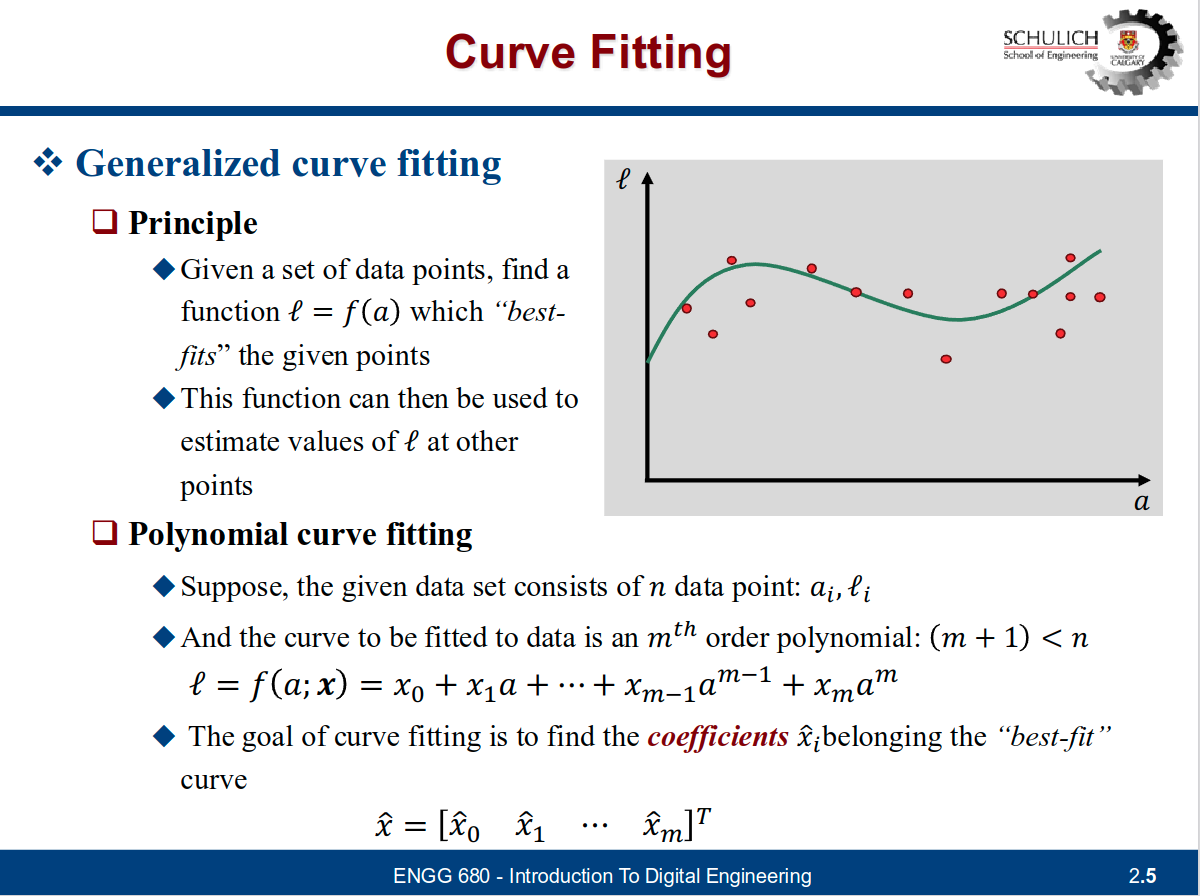

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [87]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [89]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)



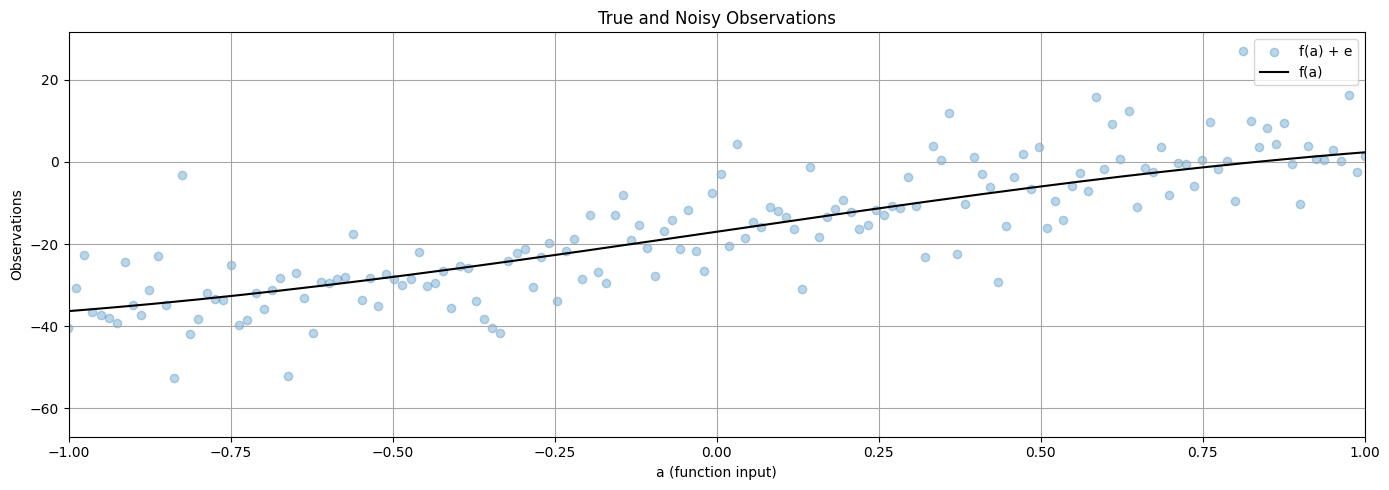

In [90]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
import matplotlib.pyplot as plt
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label="f(a)", color='k')
ax.set_xlabel("a (function input)")
ax.set_ylabel("Observations")
ax.set_title("True and Noisy Observations")
ax.set_xlim([-1, 1])
ax.legend()

ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()


plt.show()

In [91]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
# Step 1: Construct the design matrix A for polynomial regression (Vandermonde matrix)
    # Each row of A contains powers of the corresponding 'a' values
    A = np.vander(a, deg + 1, increasing=True)

    # Step 2: Perform the linear least square estimation using LSE formula
    # (A.T * P * A) * x = A.T * P * l, solve for x (the polynomial coefficients)

    # Compute A transpose times P (A^T * P)
    AtP = A.T @ P

    # Compute normal equation: (AtP @ A) * x = AtP @ l
    N = AtP @ A
    b = AtP @ l

    # Solve for x (the polynomial coefficients) using np.linalg.solve
    x = np.linalg.solve(N, b)

    # Step 3: Calculate observation residuals (v = l - A * x)
    v = l - A @ x

    # Step 4: Compute the a posteriori variance factor (apv)
    # apv = (v.T * P * v) / (n - deg - 1), where n is the number of observations
    apv = (v.T @ P @ v) / (len(l) - deg - 1)

    # Step 5: Compute the covariance matrix of the estimated coefficients (cov_x)
    cov_x = apv * np.linalg.inv(N)

    #Fixed: Corrected the indentation of the return statement to align with the function definition
    return (x, cov_x, apv, v)

In [92]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Define polynomial degrees
degrees = [1, 3, 5]

# Initialize lists to store results
results = []

# Loop through each degree, call the function, and store the results
for deg in degrees:
    result = fit_polynomial_curve(a, l, P, deg)
    results.append(result)

# If you want to access the results separately
results_deg1, results_deg3, results_deg5 = results

In [93]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

x_deg1, x_deg3, x_deg5 = results[0][0], results[1][0], results[2][0]
line_uw = np.polyval(x_deg1, a)
cubic_uw = np.polyval(x_deg3, a)
quintic_uw = np.polyval(x_deg5, a)

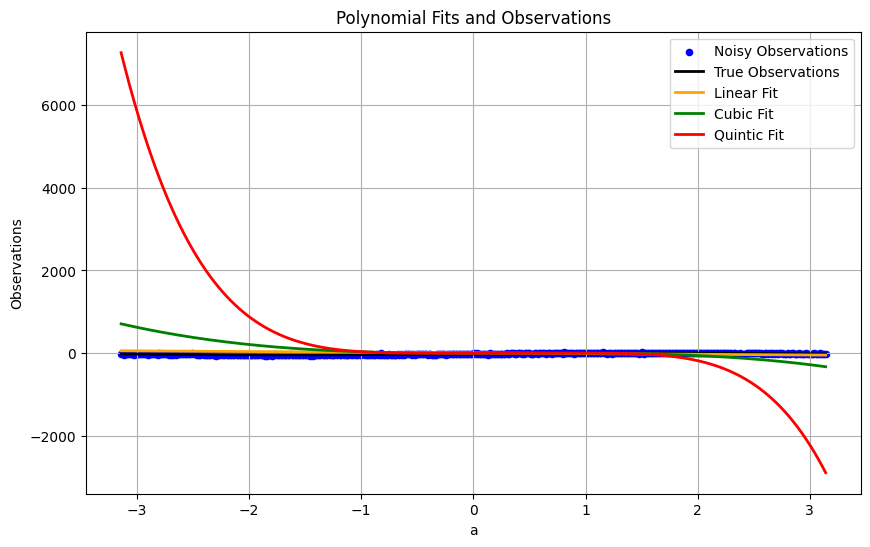

In [94]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plot the noisy and true observations
plt.figure(figsize=(10, 6))
plt.scatter(a, l, label='Noisy Observations', color='blue', s=20, marker='o')  # noisy data
plt.plot(a, l_true, label='True Observations', color='black', linewidth=2)      # true data

# Plot polynomial fits
plt.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
plt.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
plt.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Fits and Observations')
plt.legend()
plt.grid(True)

In [95]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
print("A posteriori variance factor for line:", results[0][2])
print("A posteriori variance factor for cubic:", results[1][2])
print("A posteriori variance factor for quintic:", results[2][2])

A posteriori variance factor for line: 162.742608604322
A posteriori variance factor for cubic: 66.13227783131883
A posteriori variance factor for quintic: 63.7583446301842


In [96]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

In [97]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
print("Norm between predicted observations (line) and true observations:", norm_line)
print("Norm between predicted observations (cubic) and true observations:", norm_cubic)
print("Norm between predicted observations (quintic) and true observations:", norm_quintic)

Norm between predicted observations (line) and true observations: 1123.295556947932
Norm between predicted observations (cubic) and true observations: 5090.214521501092
Norm between predicted observations (quintic) and true observations: 38448.853190087


In [98]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1/l_var)

In [99]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# Initialize lists to store results
results = []

# Loop through each degree, call the function, and store the results
for deg in degrees:
    result = fit_polynomial_curve(a, l, P, deg)
    results.append(result)


In [100]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
print("A posteriori variance factor for line:", results[0][2])
print("A posteriori variance factor for cubic:", results[1][2])
print("A posteriori variance factor for quintic:", results[2][2])

A posteriori variance factor for line: 12.054651233436907
A posteriori variance factor for cubic: 1.1444647026537131
A posteriori variance factor for quintic: 0.9447009043856552


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

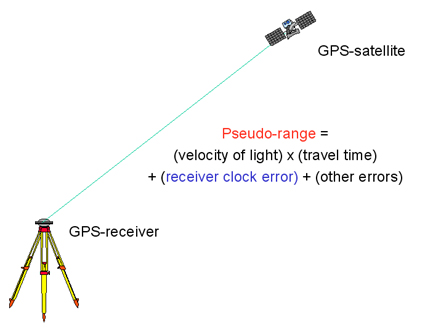

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [101]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd

# Load the pseudorange measurements from the Excel file
try:
  df_pseudorange = pd.read_excel('pseudoranges.xlsx')
  df_sat_pos = pd.read_excel('satellite_position.xlsx')

  # Convert the DataFrames to numpy arrays
  pseudorange = df_pseudorange.to_numpy()
  sat_pos = df_sat_pos.to_numpy()

  print("Data loaded successfully!")

except FileNotFoundError:
  print("Error: One or both Excel files not found. Please ensure they are uploaded or the path is correct.")


Data loaded successfully!


In [102]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = sat_pos.shape[0]

In [103]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 mark)
import numpy as np
P = np.eye(n)

In [104]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [105]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])


In [106]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
import numpy as np
delta = np.ones((4,))  # Corrections array, assuming a 3D position (x, y, z) and receiver clock bias
i = 0  # Loop counter
results = {
    'weights': [],  # To store weights or other relevant data
    'corrections': [],  # To store correction values over iterations
    'errors': [],  # To store error positions
    'iterations': []  # To store iteration values
}

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
import numpy as np

def euclidean_norm(receiver_pos, satellite_pos):
  """
  Computes the Euclidean distance between a receiver and multiple satellites.

  Args:
    receiver_pos: A NumPy array representing the receiver's position (x, y, z).
    satellite_pos: A NumPy array representing the satellites' positions (x, y, z)
                   with each row representing a satellite.

  Returns:
    A NumPy array containing the distances between the receiver and each satellite.
  """
  distances = np.sqrt(np.sum((satellite_pos - receiver_pos)**2, axis=1))
  return distances



In [107]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
import numpy as np

def design_matrix(r_pos, s_pos, rho):
  """
  Computes the design matrix A for the LSE problem.

  Args:
    r_pos: A NumPy array representing the receiver's estimated position (x, y, z).
    s_pos: A NumPy array representing the satellites' positions (x, y, z) with
           each row representing a satellite.
    rho: A NumPy array containing the geometric distances between the receiver and
         each satellite.

  Returns:
    A NumPy array representing the design matrix A.
  """
  n = s_pos.shape[0]  # Number of satellites
  A = np.zeros((n, 4))  # Initialize design matrix with zeros

  for i in range(n):
    A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]  # Partial derivative with respect to x
    A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]  # Partial derivative with respect to y
    A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]  # Partial derivative with respect to z
    A[i, 3] = 1  # Partial derivative with respect to clock bias

  return A

In [110]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

# Define the number of states (e.g., x, y, z, and clock bias)
m = 4  # Assuming 4 states: x, y, z, and clock bias

# Number of measurements (from pseudorange)
n = pseudorange.shape[0]  # Set n based on the number of measurements

# Define convergence threshold for position corrections (for x, y, z)
convergence_threshold = 0.001  # 0.1 meters

# Initialize state estimate
x_hat = np.zeros(m)  # Initial guess of the receiver's state

# Initialize corrections array delta (with large values to start the loop)
delta = np.ones(m)  # Large values so the while loop condition is initially met

# Initialize weight matrix P (identity matrix)
P = np.eye(n)  # Identity matrix of size n x n

# GroundTruth coordinates of the receiver (from Step 5)
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Initialize counter
i = 0
max_iterations = 100  # Add a maximum iteration limit

# Initialize arrays to store data for plotting later
arr_w = []        # Misclosure array
arr_delta = []    # Corrections array
arr_err_pos = []  # Error position array
arr_i = []        # Iteration counter array

# Define euclidean_norm function (Step 7 function)
def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the Euclidean distance between a receiver and multiple satellites.

    Args:
        receiver_pos: A NumPy array representing the receiver's position (x, y, z).
        satellite_pos: A NumPy array representing the satellites' positions (x, y, z)
                       with each row representing a satellite. It can also have 4 columns,
                       in which case we will ignore the last column (clock bias).

    Returns:
        A NumPy array containing the distances between the receiver and each satellite.
    """
    # Only take the first three columns (x, y, z) of the satellite positions
    distances = np.sqrt(np.sum((satellite_pos[:, :3] - receiver_pos)**2, axis=1))
    return distances

# Start the iteration loop
while np.linalg.norm(delta[:3]) >= convergence_threshold and i < max_iterations:

    # Step 1: Compute geometric distances between satellites and receiver using euclidean_norm
    rho = euclidean_norm(x_hat[:3], sat_pos)  # Receiver's estimated position (x, y, z)

    # Step 2: Compute the design matrix A
    A = design_matrix(x_hat[:3], sat_pos, rho)

    # Step 3: Compute the misclosure array w
    # Extract the pseudorange measurements (assuming they are in the first column)
    pseudorange_measurements = pseudorange[:, 0]  # Extract the first column (measurements)

    # Misclosure: w = pseudorange - estimated_pseudorange
    estimated_pseudorange = rho + x_hat[3]  # Adding clock bias (x_hat[3]) to the geometric distance
    w = pseudorange_measurements - estimated_pseudorange

    # Step 4: Regularization to handle singular matrix
    damping_factor = 1e-6  # Small damping factor to stabilize inversion
    ATA = A.T @ P @ A
    ATA += np.eye(ATA.shape[0]) * damping_factor  # Add damping term

    # Now compute the delta correction
    delta = np.linalg.inv(ATA) @ A.T @ P @ w

    # Step 5: Update the states (x_hat) with the computed corrections
    x_hat = x_hat + delta

    # Step 6: Compute the position error using the updated states against the ground truth
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Step 7: Update the iteration counter
    i += 1

    # Step 8: Store misclosure, delta, position error, and iteration counter in arrays for plotting
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence or reaching max iterations, compute the A Posteriori Variance of Unit Weight
df = n - m
residuals = w.T @ P @ w  # Misclosure term
apv = residuals / df  # A Posteriori Variance of Unit Weight

# Compute the Covariance matrix of estimated states
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

In [111]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated states:", x_hat)
print("Corrections array (delta):", delta)
print("Estimated measurements residuals (w):", w)
print("A Posteriori Variance of Unit Weight (apv):", apv)
print("Covariance matrix of estimated states (C_x_hat):\n", C_x_hat)
print("Number of iterations:", i)
print("3-D position errors:", err_pos)

# (7 marks)



Estimated states: [-1.57032968e+09 -1.39811313e+06 -4.37106712e+06 -1.57044476e+09]
Corrections array (delta): [-4.11063586e+06 -2.71498282e-01 -3.04906924e-01 -4.11033388e+06]
Estimated measurements residuals (w): [-41391.35548902  25684.57159448 -24849.03649259  22593.81749272
 -37580.36557221 -20802.59077907  19457.17846465  10203.80731058
  11014.71282053 -38409.60233784  74065.79237032]
A Posteriori Variance of Unit Weight (apv): 1844427273.9323323
Covariance matrix of estimated states (C_x_hat):
 [[3.50529404e+17 8.14471532e+09 9.34109257e+09 3.50503583e+17]
 [8.14471503e+09 2.70114931e+12 4.30068979e+11 4.98914222e+09]
 [9.34109222e+09 4.30068979e+11 2.20367281e+12 4.56626615e+09]
 [3.50503583e+17 4.98914251e+09 4.56626650e+09 3.50477764e+17]]
Number of iterations: 100
3-D position errors: 1568725520.7822526


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# # The A Posteriori Variance of Unit Weight (apv) provides a measure of the overall uncertainty in the estimates
# after considering the residuals from the least squares adjustments. A lower value of apv indicates a better fit,
# meaning that the estimated states are closer to the true measurements with less variability.

# The Covariance matrix of estimated states (C_x_hat) offers insights into the uncertainties associated with each
# estimated parameter. The diagonal elements of this matrix represent the variance of each state estimate,
# while the off-diagonal elements indicate the correlation between different state estimates. A smaller
# variance suggests higher confidence in the estimates, while large values imply greater uncertainty.

# Together, these two metrics help assess the quality of the positioning solution, guiding further
# improvements or adjustments to the model.

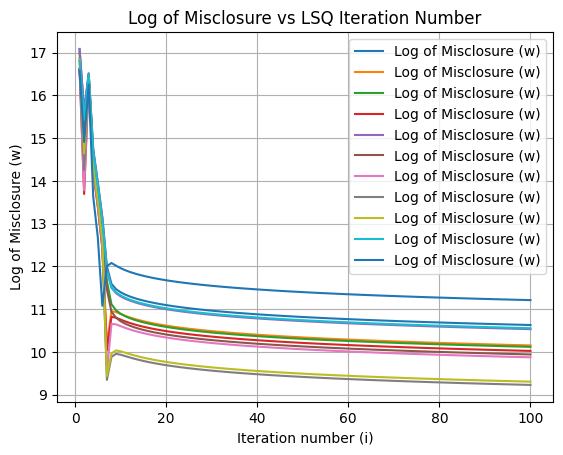

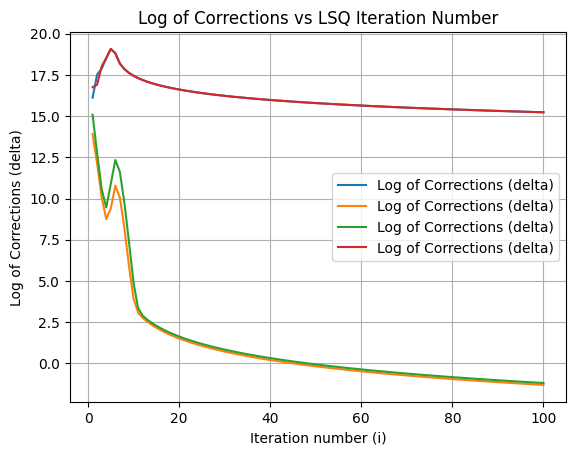

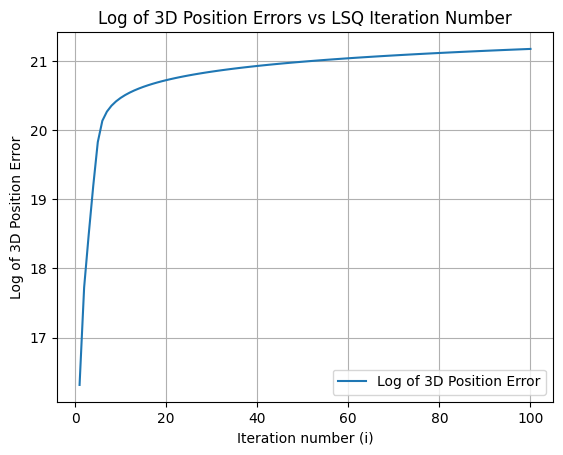

In [112]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure (w)')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections (delta)')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of Corrections (delta)')
plt.title('Log of Corrections vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Error')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of 3D Position Error')
plt.title('Log of 3D Position Errors vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
